In [4]:
!pip install transformers scikit-learn pandas numpy tqdm tensorflow
!pip install -q datasets

from sklearn.metrics import classification_report, confusion_matrix
from datasets import load_dataset
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, AutoConfig
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [5]:
model_checkpoints = [
    "distilbert-base-uncased",      # Lightweight control
    "ProsusAI/finbert",             # Domain-specific
    "albert-base-v2",              # Parameter-efficient
    "facebook/bart-base"           # Meta LLM
]

model_results = []

In [10]:
print("MODEL CONFIGURATIONS")
for ckpt in model_checkpoints:
    config = AutoConfig.from_pretrained(ckpt)
    print(f"\nModel: {ckpt}")
    print(f"- Hidden size: {config.hidden_size}")
    print(f"- Layers: {config.num_hidden_layers}")
    print(f"- Attention heads: {config.num_attention_heads}")
    print(f"- Model type: {config.model_type}")
    total_params = model.count_params()
    print(f"🔢 Total Trainable Parameters in {ckpt}: {total_params:,}")



MODEL CONFIGURATIONS

Model: distilbert-base-uncased
- Hidden size: 768
- Layers: 6
- Attention heads: 12
- Model type: distilbert
🔢 Total Trainable Parameters in distilbert-base-uncased: 140,013,315

Model: ProsusAI/finbert
- Hidden size: 768
- Layers: 12
- Attention heads: 12
- Model type: bert
🔢 Total Trainable Parameters in ProsusAI/finbert: 140,013,315

Model: albert-base-v2
- Hidden size: 768
- Layers: 12
- Attention heads: 12
- Model type: albert
🔢 Total Trainable Parameters in albert-base-v2: 140,013,315

Model: facebook/bart-base
- Hidden size: 768
- Layers: 6
- Attention heads: 12
- Model type: bart
🔢 Total Trainable Parameters in facebook/bart-base: 140,013,315


In [8]:
def tokenize_function(examples, tokenizer):
    return tokenizer(
        examples["sentence"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

def to_tf_dataset(split, shuffle=False):
    return split.to_tf_dataset(
        columns=["input_ids", "attention_mask"],
        label_cols=["label"],
        shuffle=shuffle,
        batch_size=8,
        collate_fn=None
    )



 Training model: distilbert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

README.md:   0%|          | 0.00/8.88k [00:00<?, ?B/s]

financial_phrasebank.py:   0%|          | 0.00/6.04k [00:00<?, ?B/s]

The repository for financial_phrasebank contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/financial_phrasebank.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


FinancialPhraseBank-v1.0.zip:   0%|          | 0.00/682k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2264 [00:00<?, ? examples/s]

Map:   0%|          | 0/2264 [00:00<?, ? examples/s]

Epoch 1/3
227/227 [==============================] - 18s 32ms/step - loss: 1.1303 - accuracy: 0.1844 - val_loss: 1.1262 - val_accuracy: 0.2168
Epoch 2/3
227/227 [==============================] - 6s 25ms/step - loss: 1.1294 - accuracy: 0.1850 - val_loss: 1.1262 - val_accuracy: 0.2168
Epoch 3/3
29/29 [==============================] - 1s 20ms/step - loss: 1.1313 - accuracy: 0.1718
Epoch 1/2
227/227 [==============================] - 42s 101ms/step - loss: 0.4422 - accuracy: 0.8277 - val_loss: 0.1808 - val_accuracy: 0.9381
Epoch 2/2
1/1 [==============================] - 0s 32ms/step


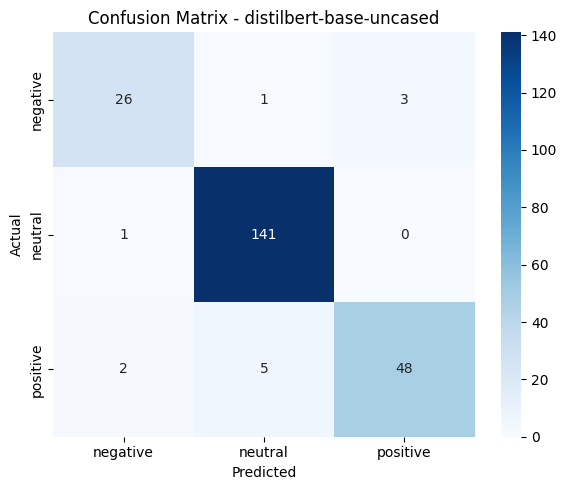

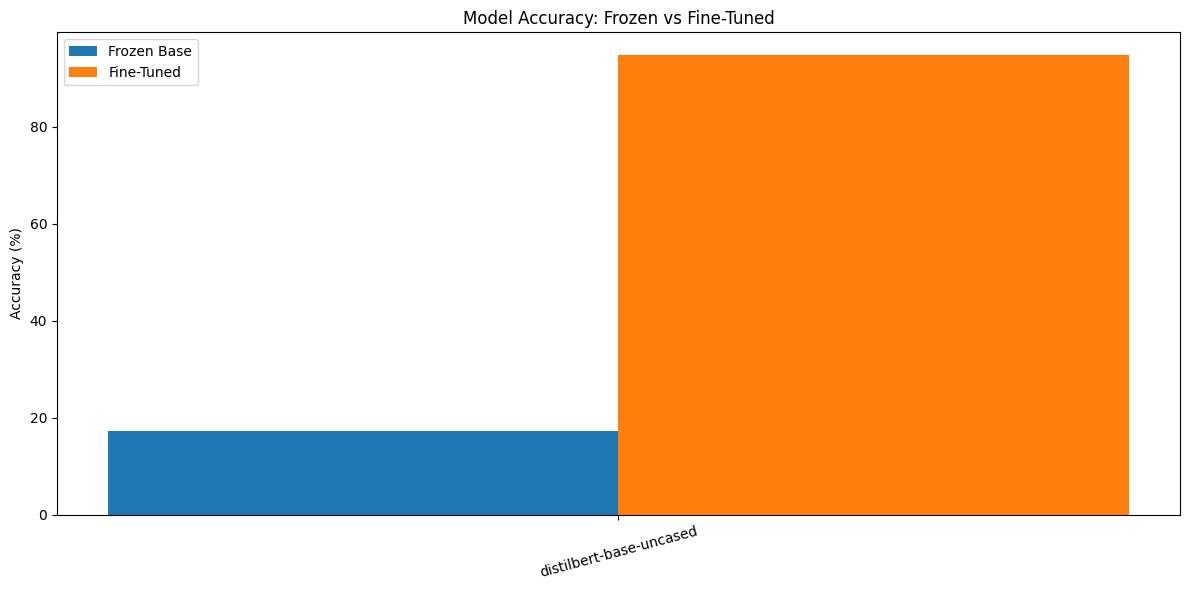


 Training model: ProsusAI/finbert


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/438M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2264 [00:00<?, ? examples/s]

Epoch 1/3
227/227 [==============================] - 29s 65ms/step - loss: 0.9966 - accuracy: 0.4191 - val_loss: 1.0351 - val_accuracy: 0.3097
Epoch 2/3
227/227 [==============================] - 12s 51ms/step - loss: 0.9953 - accuracy: 0.4152 - val_loss: 1.0351 - val_accuracy: 0.3097
Epoch 3/3
29/29 [==============================] - 1s 40ms/step - loss: 0.9911 - accuracy: 0.3789
Epoch 1/2
227/227 [==============================] - 75s 165ms/step - loss: 0.2082 - accuracy: 0.9553 - val_loss: 0.1023 - val_accuracy: 0.9646
Epoch 2/2
1/1 [==============================] - 0s 43ms/step


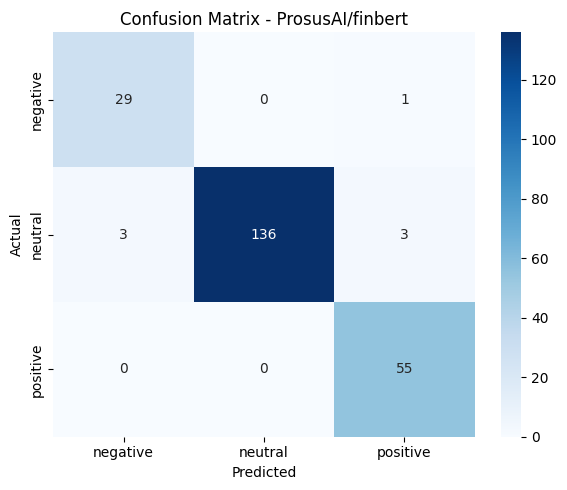

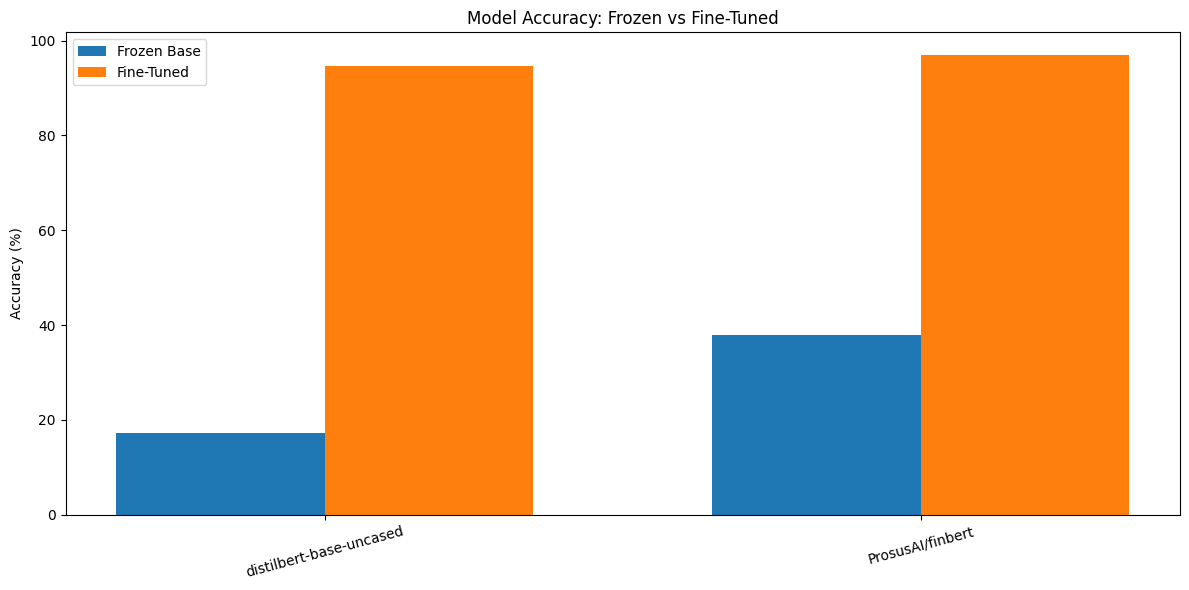


 Training model: albert-base-v2


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFAlbertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFAlbertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2264 [00:00<?, ? examples/s]

Epoch 1/3
227/227 [==============================] - 26s 59ms/step - loss: 1.0403 - accuracy: 0.5196 - val_loss: 1.0490 - val_accuracy: 0.5265
Epoch 2/3
227/227 [==============================] - 10s 46ms/step - loss: 1.0413 - accuracy: 0.5301 - val_loss: 1.0490 - val_accuracy: 0.5265
Epoch 3/3
29/29 [==============================] - 1s 40ms/step - loss: 1.0357 - accuracy: 0.5991
Epoch 1/2
227/227 [==============================] - 50s 153ms/step - loss: 0.3873 - accuracy: 0.8548 - val_loss: 0.1860 - val_accuracy: 0.9602
Epoch 2/2
1/1 [==============================] - 0s 43ms/step


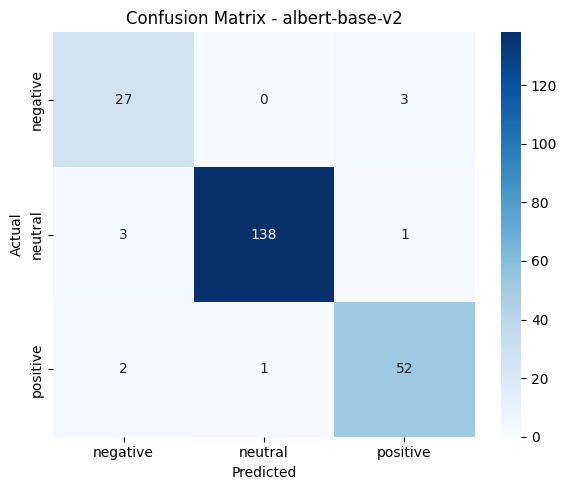

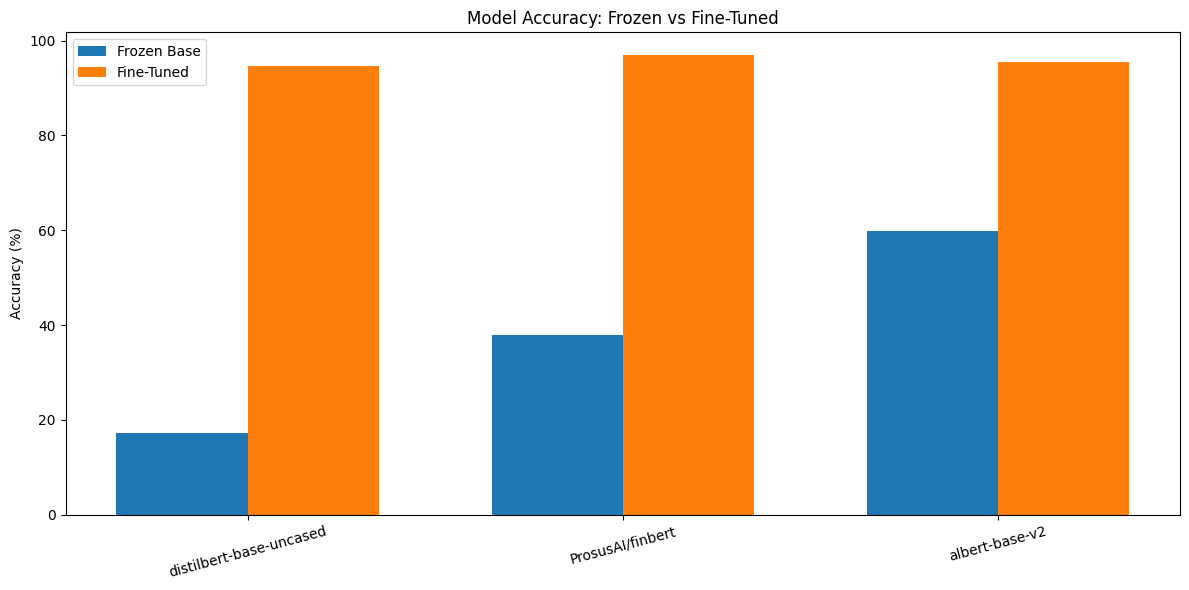


 Training model: facebook/bart-base


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBartForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBartForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classification_head.dense.weight', 'classification_head.dense.bias', 'classification_head.out_proj.weight', 'classification_head.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2264 [00:00<?, ? examples/s]

Epoch 1/3
227/227 [==============================] - 47s 98ms/step - loss: 1.3268 - accuracy: 0.2816 - val_loss: 1.2823 - val_accuracy: 0.1858
Epoch 2/3
227/227 [==============================] - 16s 69ms/step - loss: 1.3347 - accuracy: 0.2744 - val_loss: 1.2823 - val_accuracy: 0.1858
Epoch 3/3
29/29 [==============================] - 1s 50ms/step - loss: 1.3297 - accuracy: 0.1586
Epoch 1/2
227/227 [==============================] - 107s 222ms/step - loss: 0.3290 - accuracy: 0.8780 - val_loss: 0.1435 - val_accuracy: 0.9646
Epoch 2/2
1/1 [==============================] - 0s 51ms/step


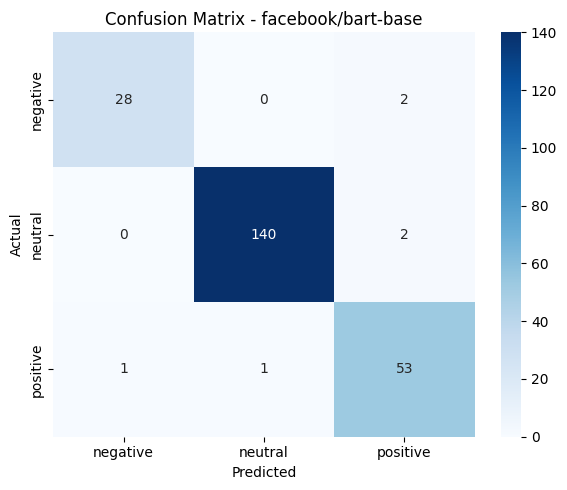

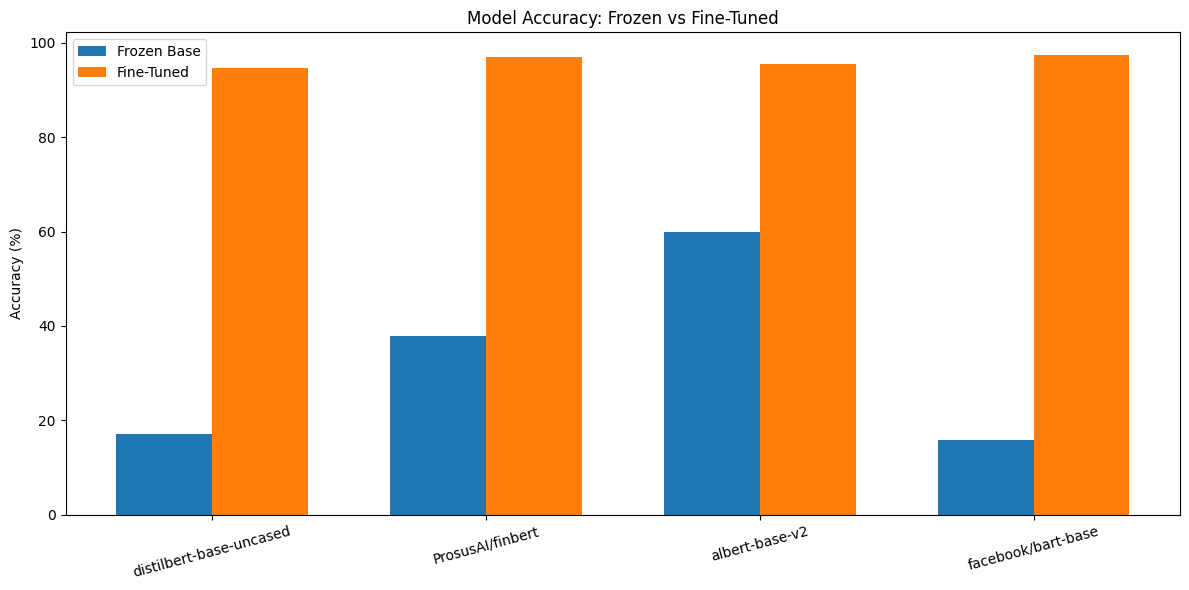

In [9]:
for ckpt in model_checkpoints:
    print(f"\n Training model: {ckpt}")

    # Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(ckpt)
    model = TFAutoModelForSequenceClassification.from_pretrained(ckpt, num_labels=3)

    # Load dataset and tokenize
    dataset = load_dataset("financial_phrasebank", "sentences_allagree")
    label_names = dataset['train'].features['label'].names
    tokenized_datasets = dataset.map(lambda x: tokenize_function(x, tokenizer), batched=True)

    # Split
    train_val_split = tokenized_datasets["train"].train_test_split(test_size=0.2, seed=42)
    val_test_split = train_val_split["test"].train_test_split(test_size=0.5, seed=42)

    tf_train_dataset = to_tf_dataset(train_val_split["train"], shuffle=True)
    tf_val_dataset = to_tf_dataset(val_test_split["train"], shuffle=True)
    tf_test_dataset = to_tf_dataset(val_test_split["test"], shuffle=False)

    # Freeze base layers first
    model.trainable = False
    model.compile(
        optimizer=tf.keras.optimizers.Adam(5e-5),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"]
    )

    # Train base classifier head
    model.fit(tf_train_dataset, epochs=3, validation_data=tf_val_dataset)
    loss_frozen, acc_frozen = model.evaluate(tf_test_dataset)

    # Fine-tune all layers
    model.trainable = True
    model.compile(
        optimizer=tf.keras.optimizers.Adam(2e-5),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"]
    )
    model.fit(tf_train_dataset, epochs=2, validation_data=tf_val_dataset)
    loss_ft, acc_ft = model.evaluate(tf_test_dataset)

    # Save results
    model_results.append({
        "model": ckpt,
        "frozen_acc": acc_frozen,
        "frozen_loss": loss_frozen,
        "ft_acc": acc_ft,
        "ft_loss": loss_ft
    })

    # Confusion matrix (optional)
    y_true, y_pred_logits = [], []
    for batch in tf_test_dataset:
        y_true.extend(batch[1].numpy())
        logits = model.predict(batch[0]).logits
        y_pred_logits.extend(logits)

    y_pred = np.argmax(y_pred_logits, axis=1)
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_names, yticklabels=label_names)
    plt.title(f"Confusion Matrix - {ckpt}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    labels = [r["model"] for r in model_results]
    frozen_accuracies = [r["frozen_acc"] * 100 for r in model_results]
    finetuned_accuracies = [r["ft_acc"] * 100 for r in model_results]

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, frozen_accuracies, width, label='Frozen Base')
    plt.bar(x + width/2, finetuned_accuracies, width, label='Fine-Tuned')
    plt.xticks(x, labels, rotation=15)
    plt.ylabel("Accuracy (%)")
    plt.title("Model Accuracy: Frozen vs Fine-Tuned")
    plt.legend()
    plt.tight_layout()
    plt.show()

